In [12]:

import pandas as pd
import tensorflow as tf
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

## 데이터 읽어오기.
raw_df = pd.read_csv("../dataset/BostonHousing.csv")

print(raw_df.info())
print(raw_df.head())


gpus = tf.config.experimental.list_physical_devices('GPU')
if gpus:
  try:
    # Currently, memory growth needs to be the same across GPUs
    for gpu in gpus:
      tf.config.experimental.set_memory_growth(gpu, True)
    logical_gpus = tf.config.experimental.list_logical_devices('GPU')
    print(len(gpus), "Physical GPUs,", len(logical_gpus), "Logical GPUs")
  except RuntimeError as e:
    # Memory growth must be set before GPUs have been initialized
    print(e)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     506 non-null    float64
 1   ZN       506 non-null    float64
 2   INDUS    506 non-null    float64
 3   CHAS     506 non-null    int64  
 4   NOX      506 non-null    float64
 5   RM       506 non-null    float64
 6   AGE      506 non-null    float64
 7   DIS      506 non-null    float64
 8   RAD      506 non-null    int64  
 9   TAX      506 non-null    int64  
 10  PTRATIO  506 non-null    float64
 11  B        506 non-null    float64
 12  LSTAT    506 non-null    float64
 13  MEDV     506 non-null    float64
dtypes: float64(11), int64(3)
memory usage: 55.5 KB
None
      CRIM    ZN  INDUS  CHAS    NOX     RM   AGE     DIS  RAD  TAX  PTRATIO  \
0  0.00632  18.0   2.31     0  0.538  6.575  65.2  4.0900    1  296     15.3   
1  0.02731   0.0   7.07     0  0.469  6.421  78.9  4.9671    2  242   

In [13]:

dataset=raw_df.copy()
label_data=dataset.pop('MEDV')
X_train1, X_test, Y_train1, Y_test= train_test_split(dataset, label_data, test_size=0.2, shuffle=True)
X_train, X_valid, Y_train, Y_valid = train_test_split(X_train1, Y_train1, test_size=0.2, shuffle=True)


In [7]:

dataset_stats = X_train.describe()
dataset_stats = dataset_stats.transpose()

def min_max_norm(x):
  return (x - dataset_stats['min']) / (dataset_stats['max'] - dataset_stats['min'])

#normed_train_data = min_max_norm(X_train)
#normed_val_data = min_max_norm(X_valid)
#normed_test_data = min_max_norm(X_test)

normed_train_data = 10*min_max_norm(X_train)
normed_val_data = 10*min_max_norm(X_valid)
normed_test_data = 10*min_max_norm(X_test)

In [14]:


# 모델의 설정
activation=tf.keras.activations.sigmoid
input_Layer = tf.keras.layers.Input(shape=(13,))
x = tf.keras.layers.Dense(120, activation=activation)(input_Layer)
x= tf.keras.layers.Dense(100, activation=activation)(x)
x= tf.keras.layers.Dense(100, activation=activation)(x)
Out_Layer= tf.keras.layers.Dense(1, activation=None)(x)

model = tf.keras.Model(inputs=[input_Layer], outputs=[Out_Layer])
model.summary()


Model: "model_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_2 (InputLayer)         [(None, 13)]              0         
_________________________________________________________________
dense_4 (Dense)              (None, 120)               1680      
_________________________________________________________________
dense_5 (Dense)              (None, 100)               12100     
_________________________________________________________________
dense_6 (Dense)              (None, 100)               10100     
_________________________________________________________________
dense_7 (Dense)              (None, 1)                 101       
Total params: 23,981
Trainable params: 23,981
Non-trainable params: 0
_________________________________________________________________


In [15]:

model.compile(loss=tf.keras.losses.mean_squared_error,
              optimizer=tf.keras.optimizers.SGD(learning_rate=0.005),
              metrics=[tf.keras.metrics.RootMeanSquaredError()])

result=model.fit(X_train, Y_train, epochs=800, batch_size=100, validation_data=(X_valid,Y_valid))
## model fit은 histoy를 반환한다. 훈련중의 발생하는 모든 정보를 담고 있는 딕셔너리.
## histoy는 딕셔너리이므로 keys()를 통해 출력의 key(카테고리)를 알 수 있다.
print(result.history.keys())


Epoch 1/800
4/4 [==============================] - 1s 61ms/step - loss: 331.2733 - root_mean_squared_error: 18.2009 - val_loss: 91.2918 - val_root_mean_squared_error: 9.5547
Epoch 2/800
4/4 [==============================] - 0s 9ms/step - loss: 90.1111 - root_mean_squared_error: 9.4927 - val_loss: 67.1742 - val_root_mean_squared_error: 8.1960
Epoch 3/800
4/4 [==============================] - 0s 10ms/step - loss: 80.9644 - root_mean_squared_error: 8.9980 - val_loss: 67.7613 - val_root_mean_squared_error: 8.2317
Epoch 4/800
4/4 [==============================] - 0s 9ms/step - loss: 80.5465 - root_mean_squared_error: 8.9748 - val_loss: 66.0056 - val_root_mean_squared_error: 8.1244
Epoch 5/800
4/4 [==============================] - 0s 10ms/step - loss: 79.7573 - root_mean_squared_error: 8.9307 - val_loss: 65.5898 - val_root_mean_squared_error: 8.0988
Epoch 6/800
4/4 [==============================] - 0s 10ms/step - loss: 79.9082 - root_mean_squared_error: 8.9391 - val_loss: 65.0822 - val_

Epoch 799/800
4/4 [==============================] - 0s 13ms/step - loss: 70.3076 - root_mean_squared_error: 8.3850 - val_loss: 60.6809 - val_root_mean_squared_error: 7.7898
Epoch 800/800
4/4 [==============================] - 0s 10ms/step - loss: 70.9484 - root_mean_squared_error: 8.4231 - val_loss: 62.0963 - val_root_mean_squared_error: 7.8801
dict_keys(['loss', 'root_mean_squared_error', 'val_loss', 'val_root_mean_squared_error'])

4/4 [==============================] - 0s 9ms/step - loss: 76.4740 - root_mean_squared_error: 8.7449 - val_loss: 60.9773 - val_root_mean_squared_error: 7.8088
dict_keys(['loss', 'root_mean_squared_error', 'val_loss', 'val_root_mean_squared_error'])

4/4 [==============================] - 0s 2ms/step - loss: 100.3225 - root_mean_squared_error: 10.0161

 Test rmse: 10.0161


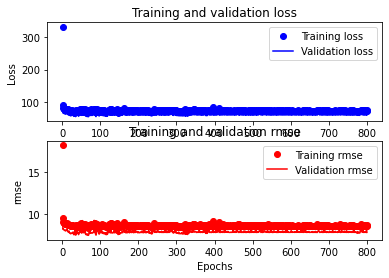

In [16]:

### history에서 loss와 val_loss의 key를 가지는 값들만 추출
loss = result.history['loss']
val_loss = result.history['val_loss']

### loss와 val_loss를 그래프화
epochs = range(1, len(loss) + 1)
plt.subplot(211)  ## 2x1 개의 그래프 중에 1번째
plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

### history에서 root_mean_squared_error val_root_mean_squared_error key를 가지는 값들만 추출
rmse = result.history['root_mean_squared_error']
val_rmse = result.history['val_root_mean_squared_error']
epochs = range(1, len(rmse) + 1)
### mean_absolute_error와  val_mean_absolute_error key를 그래프화
plt.subplot(212)  ## 2x1 개의 그래프 중에 2번째
plt.plot(epochs, rmse, 'ro', label='Training rmse')
plt.plot(epochs, val_rmse, 'r', label='Validation rmse')
plt.title('Training and validation rmse')
plt.xlabel('Epochs')
plt.ylabel('rmse')
plt.legend()

print("\n Test rmse: %.4f" % (model.evaluate(X_test,Y_test)[1]))

plt.show()


4/4 [==============================] - 0s 2ms/step - loss: 70.2391 - root_mean_squared_error: 8.3809

 Test rmse: 8.3809

4/4 [==============================] - 0s 2ms/step - loss: 100.3225 - root_mean_squared_error: 10.0161

 Test rmse: 10.0161